Loads the CSV

Cleans the data in whatever way you feel is appropriate

handle missing values if any

check types

remove duplicates if present

Computes a few basic summary statistics

min / max / mean for the numeric fields

counts per species or per lake

Produces two simple but meaningful visualizations of your choice

(e.g., histogram, line plot, scatter plot, bar chart)
Writes a short paragraph describing what you found interesting in the data

In [1]:
#Loading libraries
import pandas as pd
from pandas import DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, Select, CustomJS, Legend
from bokeh.layouts import column
from bokeh.io import output_notebook, output_file, save, show

In [2]:
#Reading csv
# Path to the CSV file
csv_file_path = '/content/example_sample_data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

print(df.head())

         date        lake  temperature_f  depth_ft        species  catch_count
0  2024-05-01  White Bear           68.6       5.2        Walleye            2
1  2024-05-02  Leech Lake           65.9      38.9  Northern Pike            3
2  2024-05-03  Minnetonka           68.6       2.6           Bass            3
3  2024-05-04  White Bear           54.1      35.6           Bass            1
4  2024-05-05  White Bear           66.5      56.5        Crappie            1


In [3]:
#data Cleaning
#checking datatypes to convert them to an appropriate type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           200 non-null    object 
 1   lake           200 non-null    object 
 2   temperature_f  200 non-null    float64
 3   depth_ft       200 non-null    float64
 4   species        200 non-null    object 
 5   catch_count    200 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 9.5+ KB


In [4]:
# Correcting datatypes
df['date'] = pd.to_datetime(df['date'])
df['lake'] = df['lake'].astype(str)
df['species'] = df['species'].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           200 non-null    datetime64[ns]
 1   lake           200 non-null    object        
 2   temperature_f  200 non-null    float64       
 3   depth_ft       200 non-null    float64       
 4   species        200 non-null    object        
 5   catch_count    200 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 9.5+ KB


In [5]:
df.head()

,date,lake,temperature_f,depth_ft,species,catch_count
0,2024-05-01,White Bear,68.6,5.2,Walleye,2
1,2024-05-02,Leech Lake,65.9,38.9,Northern Pike,3
2,2024-05-03,Minnetonka,68.6,2.6,Bass,3
3,2024-05-04,White Bear,54.1,35.6,Bass,1
4,2024-05-05,White Bear,66.5,56.5,Crappie,1


In [6]:
#Checking the count of null values in each column
col_null_counts = df.isnull().sum()
col_null_counts

,0
date,0
lake,0
temperature_f,0
depth_ft,0
species,0
catch_count,0


In [7]:

(col_null_counts / len(df)) * 100

,0
date,0.0
lake,0.0
temperature_f,0.0
depth_ft,0.0
species,0.0
catch_count,0.0


In [8]:
row_null_counts=df.isna().sum(axis=1).value_counts()
row_null_counts

,count
0,200


In [9]:
(row_null_counts / len(df) * 100)

,count
0,100.0


In [10]:
df[df.isna().sum(axis=1) < 2]

,date,lake,temperature_f,depth_ft,species,catch_count
0,2024-05-01,White Bear,68.6,5.2,Walleye,2
1,2024-05-02,Leech Lake,65.9,38.9,Northern Pike,3
2,2024-05-03,Minnetonka,68.6,2.6,Bass,3
3,2024-05-04,White Bear,54.1,35.6,Bass,1
4,2024-05-05,White Bear,66.5,56.5,Crappie,1
...,...,...,...,...,...,...
195,2024-11-12,Mille Lacs,57.9,46.6,Walleye,3
196,2024-11-13,Mille Lacs,76.1,31.7,Walleye,1
197,2024-11-14,Leech Lake,68.1,51.3,Northern Pike,3
198,2024-11-15,Minnetonka,61.1,33.6,Crappie,6


In [11]:
#Checking the percentage of null values in each column
#If there had been columns with more than 20% missing values I would have deleted them.
#I would also consult domain experts to make sure I am not deleting any important columns.
#If there had been rows with multiple missing values I would have deleted them.
#If there had been columns with less than 20% missing values.
#For temperature I would fill the weighted average of 2 preceding and 2 succeding temperature reading for the date for that lake with no of days
# from the current date as weight. We could also source this data from satellte data.
#For depth I would take average depth of the lake.
#For catch count I would take the median or mode as mean might result in a rational number.
#I would also seek if such a generalization make sense or if further granularity is required for catch count.
#In the current data we have catch count as zero, so I would like to know if that actually makes sense or if it should be handled.
#For species I would replace missing values with the most caught species for that lake.
#I would need the help from you to know how to fill lake and date missing values

In [12]:
#In later steps I would go for one hot encoding of lake and species.
#I would not prefer using coordinates of lake because it might not capture/translate the variability between lakes that are closer
# although they might have significant variability in type and counts of species.
#I would like to know the possibility of filling the values of species using the probability of species for that lake from previous recordings.

In [13]:
#Checking the percentage of null values in each column
dups = df.duplicated().sum()
dups

np.int64(0)

In [14]:
#summary statistics of columns
numerical_columns = ['temperature_f', 'depth_ft', 'catch_count']
summary = df[numerical_columns].describe()
summary


,temperature_f,depth_ft,catch_count
count,200.000000,200.000000,200.000000
mean,68.126000,32.858500,2.910000
std,7.047122,18.272494,1.748481
min,45.300000,1.600000,0.000000
25%,62.975000,17.825000,2.000000
50%,68.450000,34.450000,3.000000
75%,72.400000,49.025000,4.000000
max,95.000000,60.000000,8.000000


In [15]:
#summary statistics of columns by lake
summary_by_lake = df.groupby("lake").agg({
    "catch_count": ["count", "sum", "mean", "min", "max", "std"],
    "temperature_f": ["mean", "min", "max", "std"],
    "depth_ft": ["mean", "min", "max", "std"]
})

summary_by_lake

catch_count                                  temperature_f        \
                 count  sum      mean min max       std          mean   min   
lake                                                                          
Leech Lake          54  161  2.981481   0   7  1.742810     68.622222  56.7   
Mille Lacs          46  136  2.956522   0   8  1.954556     66.769565  45.3   
Minnetonka          46  140  3.043478   0   7  1.548570     70.323913  57.4   
White Bear          54  145  2.685185   0   7  1.757186     66.912963  53.8   

                             depth_ft                        
             max       std       mean  min   max        std  
lake                                                         
Leech Lake  87.0  6.266824  31.024074  1.6  59.4  18.527908  
Mille Lacs  83.3  7.153115  33.032609  1.7  59.2  18.961388  
Minnetonka  95.0  7.255716  32.204348  1.7  59.8  19.318293  
White Bear  82.9  7.177114  35.101852  3.7  60.0  16.711464

In [16]:
#distribution of caught fish is pretty much uniform across lakes

In [17]:
#summary statistics of columns by species
summary_by_species = df.groupby("species").agg({
    "catch_count": ["count", "sum", "mean", "min", "max", "std"],
    "temperature_f": ["mean", "min", "max", "std"],
    "depth_ft": ["mean", "min", "max", "std"]
})

summary_by_species


catch_count                                  temperature_f  \
                    count  sum      mean min max       std          mean   
species                                                                    
Bass                   47  128  2.723404   0   7  1.814221     67.185106   
Crappie                41  135  3.292683   1   8  1.778256     69.502439   
Northern Pike          57  156  2.736842   0   6  1.518062     68.842105   
Walleye                55  163  2.963636   0   8  1.885261     67.161818   

                                      depth_ft                        
                min   max       std       mean  min   max        std  
species                                                               
Bass           53.8  83.3  6.978507  34.004255  1.6  59.2  20.329674  
Crappie        45.3  95.0  8.619411  33.582927  2.1  59.4  16.376277  
Northern Pike  58.8  83.0  5.840620  33.036842  3.5  59.6  18.062378  
Walleye        54.9  85.2  6.886393  31.154545  2.4  60.0  18.353189

In [18]:
#distribution of caught fish is a non-uniform across species

In [19]:
#summary statistics of columns by lake and species
summary_lake_species = df.groupby(["lake", "species"]).agg({
    "catch_count": ["count", "sum", "mean", "min", "max", "std"],
    "temperature_f": ["mean", "min", "max", "std"],
    "depth_ft": ["mean", "min", "max", "std"]
})

summary_lake_species

catch_count                                  \
                               count sum      mean min max       std   
lake       species                                                     
Leech Lake Bass                   14  36  2.571429   0   7  2.027286   
           Crappie                12  47  3.916667   2   6  1.240112   
           Northern Pike          14  38  2.714286   0   6  1.772811   
           Walleye                14  40  2.857143   0   5  1.657484   
Mille Lacs Bass                   12  33  2.750000   0   7  1.959824   
           Crappie                 7  26  3.714286   1   8  2.288689   
           Northern Pike          12  36  3.000000   0   6  1.906925   
           Walleye                15  41  2.733333   1   8  1.944467   
Minnetonka Bass                    7  22  3.142857   2   4  0.690066   
           Crappie                12  43  3.583333   1   6  1.880925   
           Northern Pike          17  43  2.529412   1   4  1.007326   
           Walleye                10  32  3.200000   0   7  2.149935   
White Bear Bass                   14  37  2.642857   0   7  1.984833   
           Crappie                10  19  1.900000   1   4  1.197219   
           Northern Pike          14  39  2.785714   1   5  1.528125   
           Walleye                16  50  3.125000   0   7  1.995829   

                         temperature_f                          depth_ft  \
                                  mean   min   max        std       mean   
lake       species                                                         
Leech Lake Bass              66.428571  56.7  81.3   7.103783  30.307143   
           Crappie           71.650000  61.4  87.0   7.988685  32.958333   
           Northern Pike     70.142857  64.6  75.6   3.198248  34.264286   
           Walleye           66.700000  58.1  74.7   5.030522  26.842857   
Mille Lacs Bass              70.341667  59.3  83.3   6.643173  37.808333   
           Crappie           62.814286  45.3  73.5  10.012231  38.728571   
           Northern Pike     65.725000  58.8  77.1   5.170568  29.883333   
           Walleye           66.593333  57.4  76.1   6.789326  29.073333   
Minnetonka Bass              68.471429  62.3  71.6   3.009825  26.057143   
           Crappie           72.300000  61.1  95.0   9.503205  32.775000   
           Northern Pike     68.982353  59.4  83.0   6.627993  34.900000   
           Walleye           71.530000  57.4  85.2   7.471137  31.240000   
White Bear Bass              64.592857  53.8  79.4   7.898925  38.414286   
           Crappie           68.250000  60.0  74.1   4.676240  31.700000   
           Northern Pike     70.042857  60.5  82.9   6.903590  32.250000   
           Walleye           65.368750  54.9  80.4   7.456784  36.825000   

                                                 
                           min   max        std  
lake       species                               
Leech Lake Bass            1.6  57.8  18.839503  
           Crappie         2.1  59.4  21.407495  
           Northern Pike   3.5  57.8  17.625969  
           Walleye         2.4  52.8  17.664119  
Mille Lacs Bass            1.7  59.2  17.776821  
           Crappie         7.9  57.3  18.684906  
           Northern Pike   4.4  59.2  18.668682  
           Walleye         4.3  58.2  20.562534  
Minnetonka Bass            1.7  59.2  27.625221  
           Crappie        17.6  53.6  12.022035  
           Northern Pike   5.1  59.6  20.422537  
           Walleye         2.6  59.8  19.862203  
White Bear Bass            3.7  58.2  20.120937  
           Crappie         5.8  56.5  14.017132  
           Northern Pike   6.0  57.1  16.445937  
           Walleye         5.2  60.0  15.965108

In [20]:
#distribution of caught fish is non-uniform across (lakes, species)

In [21]:
df[['lake','species']].value_counts().sort_index(level=[0,1])

lake        species      
Leech Lake  Bass             14
            Crappie          12
            Northern Pike    14
            Walleye          14
Mille Lacs  Bass             12
            Crappie           7
            Northern Pike    12
            Walleye          15
Minnetonka  Bass              7
            Crappie          12
            Northern Pike    17
            Walleye          10
White Bear  Bass             14
            Crappie          10
            Northern Pike    14
            Walleye          16
Name: count, dtype: int64

In [22]:
#there is a l

In [23]:

pd.DataFrame(df[['lake','species']].value_counts().sort_index(level=[0,1]))

count
lake       species             
Leech Lake Bass              14
           Crappie           12
           Northern Pike     14
           Walleye           14
Mille Lacs Bass              12
           Crappie            7
           Northern Pike     12
           Walleye           15
Minnetonka Bass               7
           Crappie           12
           Northern Pike     17
           Walleye           10
White Bear Bass              14
           Crappie           10
           Northern Pike     14
           Walleye           16

In [24]:
# # Count species per lake
# species_counts = df.groupby(["lake", "species"]).size().reset_index(name="count")


# # Pivot so lakes are on x-axis and species are separate colored bars
# pivot_table = species_counts.pivot(index="lake", columns="species", values="count")


# ax = pivot_table.plot(kind="bar", figsize=(10,6))

# y_min, y_max = ax.get_ylim()
# y_range = y_max - y_min
# ax.set_ylim(y_min, y_max + 0.20 * y_range)

# plt.legend(title="Species", loc="upper right")
# plt.title("Species Counts per Lake")
# plt.xlabel("Lake")
# plt.ylabel("Count")
# plt.xticks(rotation=0)
# plt.tight_layout()
# plt.savefig("species_counts_per_lake.png", dpi=300, bbox_inches="tight")
# plt.show()

<Figure size 1000x600 with 0 Axes>

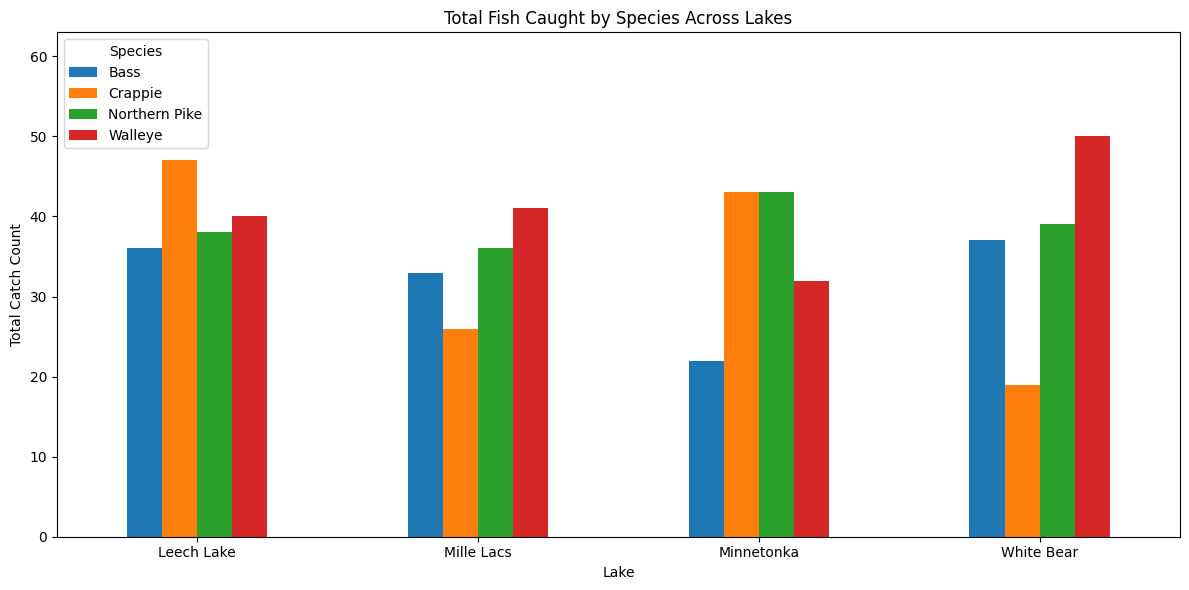

In [25]:
# Aggregate sum of catch_count by lake and species
lake_species_agg = (
    df.groupby(["lake", "species"])["catch_count"]
      .sum()
      .reset_index()
)

# Pivot so that species = columns, lakes = rows
pivot = lake_species_agg.pivot(index="lake", columns="species", values="catch_count")

plt.figure(figsize=(10,6))
ax = pivot.plot(kind="bar", figsize=(12,6))
y_min, y_max = ax.get_ylim()
y_range = y_max - y_min
ax.set_ylim(y_min, y_max + 0.20 * y_range)

plt.title("Total Fish Caught by Species Across Lakes")
plt.xlabel("Lake")
plt.ylabel("Total Catch Count")
plt.xticks(rotation=0)

plt.legend(title="Species")
plt.tight_layout()
plt.savefig("total_catch_by_lake_species.png", dpi=300, bbox_inches="tight")
plt.show()


In [26]:
#Species composition varies highly across lakes.
# we observe that distribution of species of fish caught per lake per species non-uniform.
#Although it is a little uniform for Leech Lake, Mille Lacs; Minnetonka and White Bear show a lot of variation.

In [27]:
# # Aggregate catch count per lake per date
# ts = df.groupby(["date","species"])["catch_count"].sum().reset_index()

# plt.figure(figsize=(10,6))

# for lake, grp in ts.groupby("species"):
#     plt.plot(grp["date"], grp["catch_count"], label=lake)

# plt.title("Catch Count Time Series per species")
# plt.xlabel("Date")
# plt.ylabel("Catch Count")
# plt.legend()
# plt.tight_layout()
# plt.savefig("Catch_Count_Time_Series_per_species.png", dpi=300, bbox_inches="tight")
# plt.show()

In [28]:
# # Aggregate catch count per lake per date
# ts = df.groupby(["date","lake"])["catch_count"].sum().reset_index()

# plt.figure(figsize=(10,6))

# for lake, grp in ts.groupby("lake"):
#     plt.plot(grp["date"], grp["catch_count"], label=lake)

# plt.title("Catch Count Time Series per Lake")
# plt.xlabel("Date")
# plt.ylabel("Catch Count")
# plt.legend()
# plt.tight_layout()
# plt.savefig("Catch_Count_Time_Series_per_Lake.png", dpi=300, bbox_inches="tight")
# plt.show()

In [29]:
# # Aggregate average temperature per lake per date
# ts_temp = df.groupby(["date", "lake"])["temperature_f"].mean().reset_index()

# plt.figure(figsize=(10,6))

# for lake, grp in ts_temp.groupby("lake"):
#     plt.plot(grp["date"], grp["temperature_f"], label=lake)

# plt.title("Water Temperature Time Series per Lake")
# plt.xlabel("Date")
# plt.ylabel("Temperature (°F)")
# plt.legend()
# plt.tight_layout()
# plt.savefig("Water_Temperature_Time_Series_per_Lake.png", dpi=300, bbox_inches="tight")
# plt.show()

In [30]:
def time_series_plot(df, group_col, y_col, aggregation, title, y_label):
  # Aggregation of y_col per group_col per date
  ts_temp = df.groupby(["date", group_col])[y_col].agg(aggregation).reset_index()

  plt.figure(figsize=(10,6))

  for group_name, grp in ts_temp.groupby(group_col):
      plt.plot(grp["date"], grp[y_col], label=group_name)

  plt.title(title)
  plt.xlabel("Date")
  plt.ylabel(y_label)
  plt.legend()
  plt.tight_layout()
  plt.savefig(title+".png", dpi=300, bbox_inches="tight")
  plt.show()

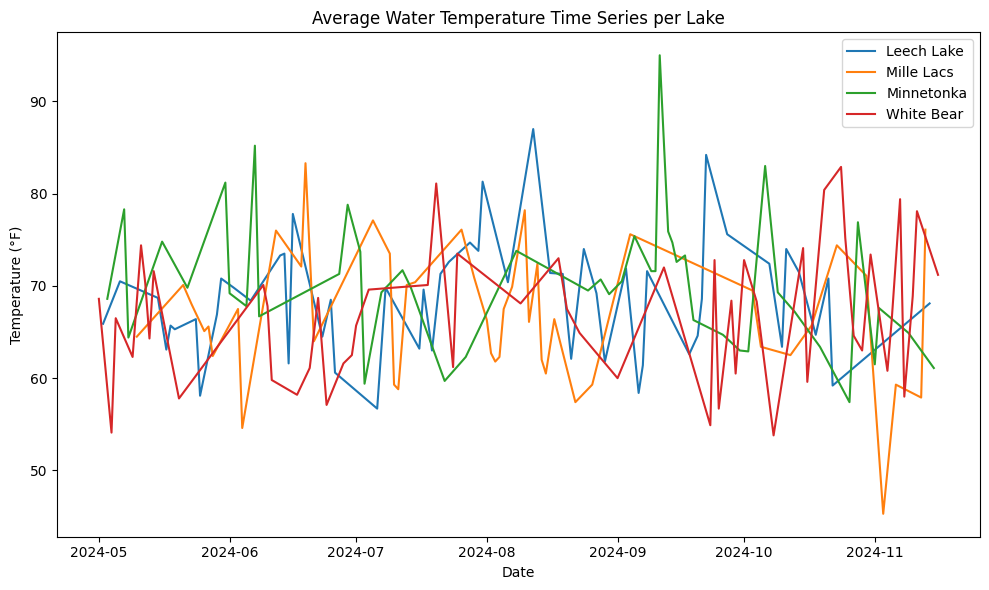

In [31]:
# time_series_plot(x, y, aggregation, title, y_label)
time_series_plot(df, "lake", "temperature_f", "mean", "Average Water Temperature Time Series per Lake", "Temperature (°F)")

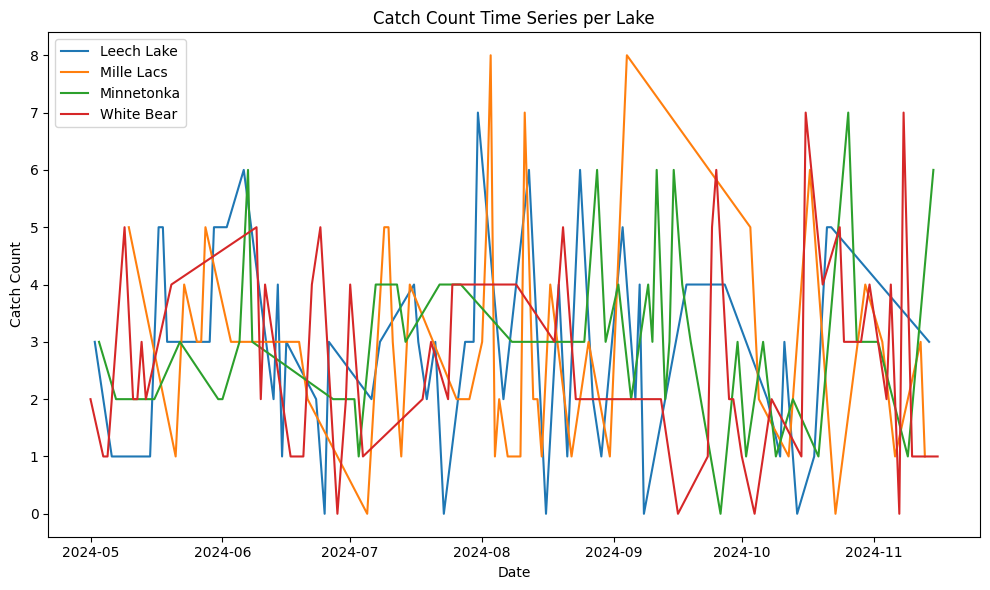

In [32]:
# time_series_plot(x, y, aggregation, title, y_label)
time_series_plot(df, "lake", "catch_count", "sum", "Catch Count Time Series per Lake", "Catch Count")

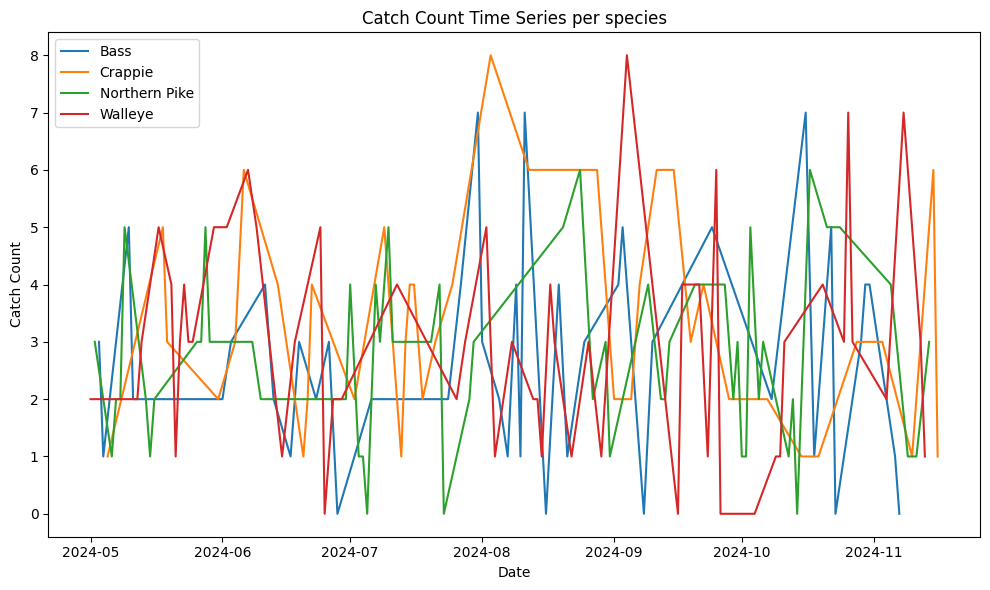

In [33]:
# time_series_plot(x, y, aggregation, title, y_label)
time_series_plot(df, "species", "catch_count", "sum", "Catch Count Time Series per species", "Catch Count")

In [34]:
# # Convert date to Month Period
# df['month'] = df['date'].dt.to_period('M')

# # Aggregate catch count per lake per month
# ts_month = df.groupby(['month', 'lake'])['catch_count'].sum().reset_index()

# # Convert month back to timestamp for plotting
# ts_month['month'] = ts_month['month'].dt.to_timestamp()

# plt.figure(figsize=(10,6))

# for lake, grp in ts_month.groupby("lake"):
#     plt.plot(grp["month"], grp["catch_count"], label=lake)

# plt.title("Monthly Catch Count per Lake")
# plt.xlabel("Month")
# plt.ylabel("Total Catch Count")
# plt.legend()
# plt.tight_layout()
# plt.savefig("Monthly_Count_Time_Series_per_Lake.png", dpi=300, bbox_inches="tight")
# plt.show()


In [35]:

# # Convert date to Month Period
# df['month'] = df['date'].dt.to_period('M')

# # Aggregate catch count per lake per month
# ts_month = df.groupby(['month', 'species'])['catch_count'].sum().reset_index()

# # Convert month back to timestamp for plotting
# ts_month['month'] = ts_month['month'].dt.to_timestamp()

# plt.figure(figsize=(10,6))

# for lake, grp in ts_month.groupby("species"):
#     plt.plot(grp["month"], grp["catch_count"], label=lake)

# plt.title("Monthly Catch Count per Species")
# plt.xlabel("Month")
# plt.ylabel("Total Catch Count")
# plt.legend()
# plt.tight_layout()
# plt.savefig("Monthly_Catch_Count_Time_Series_per_species.png", dpi=300, bbox_inches="tight")
# plt.show()


In [36]:
# df['date'] = pd.to_datetime(df['date'])

# # Convert date to Month Period
# df['month'] = df['date'].dt.to_period('M')

# # Aggregate catch count per lake per month
# ts_month = df.groupby(['month', 'lake'])['temperature_f'].mean().reset_index()

# # Convert month back to timestamp for plotting
# ts_month['month'] = ts_month['month'].dt.to_timestamp()

# plt.figure(figsize=(10,6))

# for lake, grp in ts_month.groupby("lake"):
#     plt.plot(grp["month"], grp["temperature_f"], label=lake)

# plt.title("Monthly Average Water Temperature per Lake")
# plt.xlabel("Month")
# plt.ylabel("Total Catch Count")
# plt.legend()
# plt.tight_layout()
# plt.savefig("Monthly_Water_Temperature_per_Lake.png", dpi=300, bbox_inches="tight")
# plt.show()


In [37]:
def monthly_time_series_plot(df, group_col, y_col, aggregation, title, y_label):

  #Rolling time to month
  ts_temp = df.copy()
  ts_temp['month_year'] = ts_temp['date'].dt.to_period('M')

  # Aggregation of y_col per group_col per date
  ts_temp = ts_temp.groupby(["month_year", group_col])[y_col].agg(aggregation).reset_index()

  # Convert month back to timestamp for plotting
  ts_temp['month_year'] = ts_temp['month_year'].dt.to_timestamp()

  plt.figure(figsize=(10,6))

  # For each unique value in group_col, extract its subset of monthly data and plot one line.
  for group_name, grp in ts_temp.groupby(group_col):
      plt.plot(grp["month_year"], grp[y_col], label=group_name)

  plt.title("Monthly "+title)
  plt.xlabel("month_year")
  plt.ylabel(y_label)
  plt.legend()
  plt.tight_layout()
  plt.savefig("Monthly "+title+".png", dpi=300, bbox_inches="tight")
  plt.show()

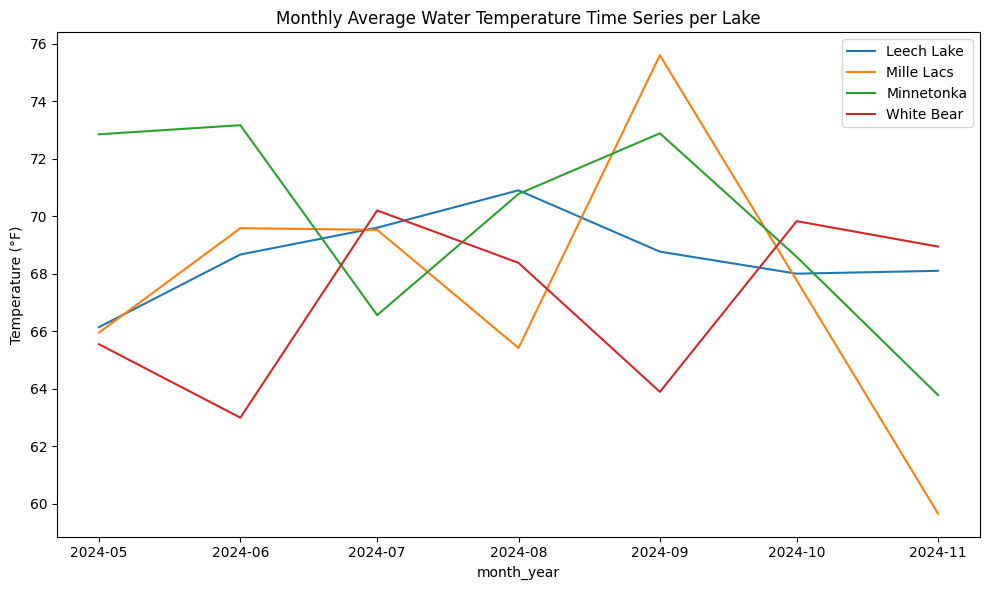

In [38]:
# def monthly_time_series_plot(df, x, y, aggregation, title, y_label):
monthly_time_series_plot(df, "lake", "temperature_f", "mean", "Average Water Temperature Time Series per Lake", "Temperature (°F)")

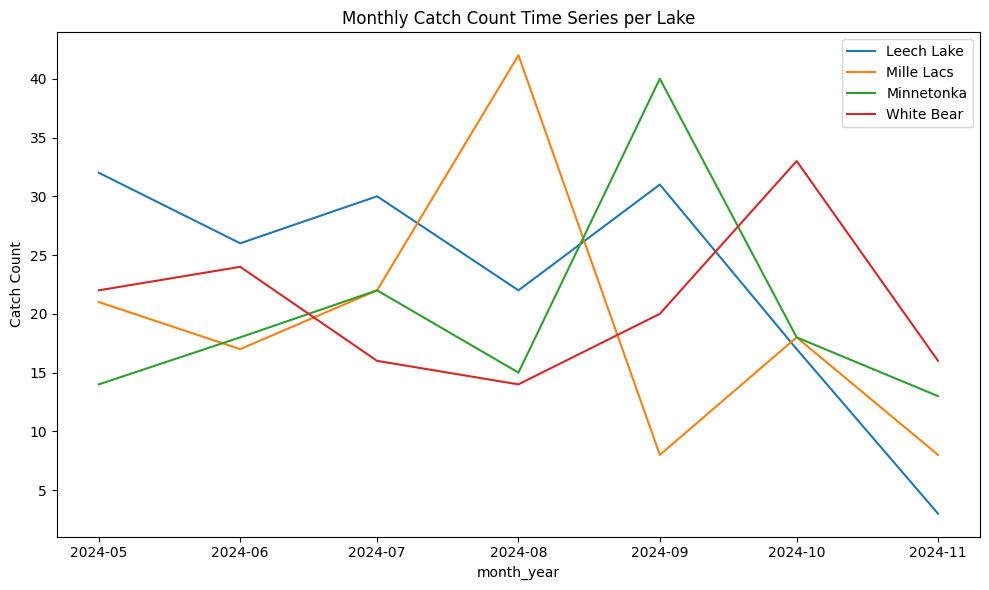

In [39]:
# def monthly_time_series_plot(df, x, y, aggregation, title, y_label):
monthly_time_series_plot(df, "lake", "catch_count", "sum", "Catch Count Time Series per Lake", "Catch Count")

In [ ]:
# Fishing success varies significantly by lake.
# Monthly catch curves differ in trend and magnitude.
# Lakes show different population structures.
# Bar charts show species compositions vary widely by lake.
# This supports the idea that lake-specific fishing recommendations should be made.

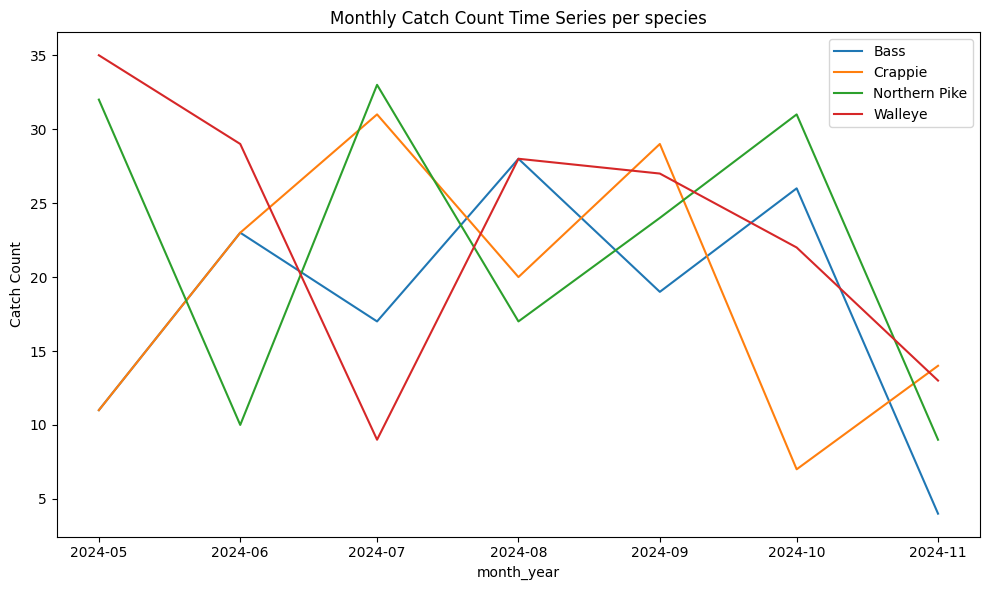

In [40]:
# def monthly_time_series_plot(df, x, y, aggregation, title, y_label):
monthly_time_series_plot(df, "species", "catch_count", "sum", "Catch Count Time Series per species", "Catch Count")


In [41]:
#Time series plots does not reveal any trend. The dip in the catch count for november can be attributed to the fact that we have data only for first half of the month.

In [42]:
# from bokeh.plotting import figure
# from bokeh.models import ColumnDataSource, Select, CustomJS, Legend, Label
# from bokeh.layouts import column
# from bokeh.io import output_file, save
# import pandas as pd
# import numpy as np


# # Prepare data
# species_list = sorted(df["species"].unique().tolist())
# lakes = sorted(df["lake"].unique().tolist())
# lake_options = ["All"] + lakes

# # Full source with all rows
# source_all = ColumnDataSource(df)

# # Create per-species sources (scatter + regression)
# scatter_sources = {}
# line_sources = {}
# colors = ["red", "blue", "green", "orange"]

# for sp in species_list:
#     sub = df[df["species"] == sp]
#     x = sub["temperature_f"].values
#     y = sub["catch_count"].values

#     scatter_sources[sp] = ColumnDataSource(data=dict(
#         temperature_f=x,
#         catch_count=y,
#     ))

#     # initial regression over all lakes
#     if len(sub) >= 2:
#         m, b = np.polyfit(x, y, 1)
#         xs = np.linspace(x.min(), x.max(), 100)
#         ys = m * xs + b
#     else:
#         xs, ys = np.array([]), np.array([])

#     line_sources[sp] = ColumnDataSource(data=dict(xs=xs, ys=ys))

# # Figure
# p = figure(
#     width=800,
#     height=500,
#     title="Temperature vs Catch Count — Lake Dropdown + Species Colors/Regression",
#     x_axis_label="Temperature (°F)",
#     y_axis_label="Catch Count",
#     tools="pan,wheel_zoom,reset,box_zoom,save",
# )

# # Expand x and y ranges by +10
# x_min = df["temperature_f"].min()
# x_max = df["temperature_f"].max()
# y_min = df["catch_count"].min()
# y_max = df["catch_count"].max()
# x_range = x_max - x_min
# y_range = y_max - y_min


# p.x_range.start = x_min - 0.2*(x_range)
# p.x_range.end   = x_max + 0.2*(x_range)

# p.y_range.start = y_min - 0.2*(y_range)
# p.y_range.end   = y_max + 0.2*(y_range)


# legend_items = []

# # Add description text as a dummy legend item BEFORE species items
# legend_items.append(("Click species to show/hide", []))

# for sp, color in zip(species_list, colors):
#     scat_src = scatter_sources[sp]
#     line_src = line_sources[sp]

#     r_scatter = p.scatter("temperature_f", "catch_count",
#                           source=scat_src, size=7, alpha=0.6, color=color)
#     r_line = p.line("xs", "ys", source=line_src, line_width=2, color=color)

#     legend_items.append((sp, [r_scatter, r_line]))

# # Legend inside plot
# legend = Legend(items=legend_items, location="top_left")
# legend.click_policy = "hide"
# p.add_layout(legend)

# # Dropdown for lake
# select = Select(title="Lake", value="All", options=lake_options)

# # CustomJS callback
# callback_code = """
# const data_all = source_all.data;
# const temp_all = data_all['temperature_f'];
# const catch_all = data_all['catch_count'];
# const lake_all = data_all['lake'];
# const species_all = data_all['species'];

# const lake = select.value;
# const species_list = species_list_js;

# for (let s = 0; s < species_list.length; s++) {
#     const sp = species_list[s];
#     const scat_src = scatter_sources[sp];
#     const line_src = line_sources[sp];

#     const scat_data = scat_src.data;
#     const line_data = line_src.data;

#     const temp = [];
#     const catch_c = [];

#     // filter rows for this species and selected lake
#     for (let i = 0; i < temp_all.length; i++) {
#         if ((lake === "All" || lake_all[i] === lake) && species_all[i] === sp) {
#             temp.push(temp_all[i]);
#             catch_c.push(catch_all[i]);
#         }
#     }

#     // update scatter data
#     scat_data['temperature_f'] = temp;
#     scat_data['catch_count'] = catch_c;

#     // compute regression line
#     let xs = [];
#     let ys = [];

#     if (temp.length >= 2) {
#         const n = temp.length;
#         let sumx = 0, sumy = 0, sumxy = 0, sumxx = 0;

#         for (let j = 0; j < n; j++) {
#             const x = temp[j];
#             const y = catch_c[j];
#             sumx += x;
#             sumy += y;
#             sumxy += x * y;
#             sumxx += x * x;
#         }

#         const denom = n * sumxx - sumx * sumx;
#         if (denom !== 0) {
#             const m = (n * sumxy - sumx * sumy) / denom;
#             const b = (sumy - m * sumx) / n;

#             let minx = Math.min.apply(null, temp);
#             let maxx = Math.max.apply(null, temp);
#             if (minx === maxx) {
#                 xs = [minx];
#                 ys = [m * minx + b];
#             } else {
#                 const steps = 50;
#                 const step = (maxx - minx) / (steps - 1);
#                 for (let k = 0; k < steps; k++) {
#                     const xval = minx + step * k;
#                     xs.push(xval);
#                     ys.push(m * xval + b);
#                 }
#             }
#         }
#     }

#     line_data['xs'] = xs;
#     line_data['ys'] = ys;

#     scat_src.change.emit();
#     line_src.change.emit();
# }
# """

# callback = CustomJS(
#     args=dict(
#         source_all=source_all,
#         scatter_sources=scatter_sources,
#         line_sources=line_sources,
#         select=select,
#         species_list_js=species_list,
#     ),
#     code=callback_code,
# )

# select.js_on_change("value", callback)

# layout = column(select, p)

# # Export to standalone HTML
# output_path = "temp_catch_lake_dropdown_species_regression.html"
# output_file(output_path, title="Temperature vs Catch Count — Lake Dropdown + Species Regression")
# save(layout)

# output_path


In [43]:
# from bokeh.plotting import figure, show
# from bokeh.models import ColumnDataSource, Select, CustomJS, Legend, Label
# from bokeh.layouts import column
# from bokeh.io import output_file, save, reset_output, output_notebook
# import pandas as pd
# import numpy as np

# # Load data
# # df = pd.read_csv("/mnt/data/example_sample_data.csv")

# # Prepare data
# species_list = sorted(df["species"].unique().tolist())
# lakes = sorted(df["lake"].unique().tolist())
# lake_options = ["All"] + lakes

# # Full source with all rows
# source_all = ColumnDataSource(df)

# # Create per-species sources (scatter + regression)
# scatter_sources = {}
# line_sources = {}
# colors = ["red", "blue", "green", "orange"]

# for sp in species_list:
#     sub = df[df["species"] == sp]
#     x = sub["depth_ft"].values
#     y = sub["catch_count"].values

#     scatter_sources[sp] = ColumnDataSource(data=dict(
#         depth_ft=x,
#         catch_count=y,
#     ))

#     # initial regression over all lakes
#     if len(sub) >= 2:
#         m, b = np.polyfit(x, y, 1)
#         xs = np.linspace(x.min(), x.max(), 100)
#         ys = m * xs + b
#     else:
#         xs, ys = np.array([]), np.array([])

#     line_sources[sp] = ColumnDataSource(data=dict(xs=xs, ys=ys))

# # Figure
# p = figure(
#     width=800,
#     height=500,
#     title="Depth vs Catch Count — Lake Dropdown + Species Colors/Regression",
#     x_axis_label="Depth (ft)",
#     y_axis_label="Catch Count",
#     tools="pan,wheel_zoom,reset,box_zoom,save",
# )

# # Expand x and y ranges by +10
# x_min = df["depth_ft"].min()
# x_max = df["depth_ft"].max()
# y_min = df["catch_count"].min()
# y_max = df["catch_count"].max()
# x_range = x_max - x_min
# y_range = y_max - y_min


# p.x_range.start = x_min - 0.2*(x_range)
# p.x_range.end   = x_max + 0.2*(x_range)

# p.y_range.start = y_min - 0.2*(y_range)
# p.y_range.end   = y_max + 0.2*(y_range)

# legend_items = []

# # Add description text as a dummy legend item BEFORE species items
# legend_items.append(("Click species to show/hide", []))

# for sp, color in zip(species_list, colors):
#     scat_src = scatter_sources[sp]
#     line_src = line_sources[sp]

#     r_scatter = p.scatter("depth_ft", "catch_count",
#                           source=scat_src, size=7, alpha=0.6, color=color)
#     r_line = p.line("xs", "ys", source=line_src, line_width=2, color=color)

#     legend_items.append((sp, [r_scatter, r_line]))

# # Legend inside plot
# legend = Legend(items=legend_items, location="top_left")
# legend.click_policy = "hide"
# p.add_layout(legend)

# # Dropdown for lake
# select = Select(title="Lake", value="All", options=lake_options)

# # CustomJS callback
# callback_code = """
# const data_all = source_all.data;
# const temp_all = data_all['temperature_f'];
# const catch_all = data_all['catch_count'];
# const lake_all = data_all['lake'];
# const species_all = data_all['species'];

# const lake = select.value;
# const species_list = species_list_js;

# for (let s = 0; s < species_list.length; s++) {
#     const sp = species_list[s];
#     const scat_src = scatter_sources[sp];
#     const line_src = line_sources[sp];

#     const scat_data = scat_src.data;
#     const line_data = line_src.data;

#     const temp = [];
#     const catch_c = [];

#     // filter rows for this species and selected lake
#     for (let i = 0; i < temp_all.length; i++) {
#         if ((lake === "All" || lake_all[i] === lake) && species_all[i] === sp) {
#             temp.push(temp_all[i]);
#             catch_c.push(catch_all[i]);
#         }
#     }

#     // update scatter data
#     scat_data['temperature_f'] = temp;
#     scat_data['catch_count'] = catch_c;

#     // compute regression line
#     let xs = [];
#     let ys = [];

#     if (temp.length >= 2) {
#         const n = temp.length;
#         let sumx = 0, sumy = 0, sumxy = 0, sumxx = 0;

#         for (let j = 0; j < n; j++) {
#             const x = temp[j];
#             const y = catch_c[j];
#             sumx += x;
#             sumy += y;
#             sumxy += x * y;
#             sumxx += x * x;
#         }

#         const denom = n * sumxx - sumx * sumx;
#         if (denom !== 0) {
#             const m = (n * sumxy - sumx * sumy) / denom;
#             const b = (sumy - m * sumx) / n;

#             let minx = Math.min.apply(null, temp);
#             let maxx = Math.max.apply(null, temp);
#             if (minx === maxx) {
#                 xs = [minx];
#                 ys = [m * minx + b];
#             } else {
#                 const steps = 50;
#                 const step = (maxx - minx) / (steps - 1);
#                 for (let k = 0; k < steps; k++) {
#                     const xval = minx + step * k;
#                     xs.push(xval);
#                     ys.push(m * xval + b);
#                 }
#             }
#         }
#     }

#     line_data['xs'] = xs;
#     line_data['ys'] = ys;

#     scat_src.change.emit();
#     line_src.change.emit();
# }
# """

# callback = CustomJS(
#     args=dict(
#         source_all=source_all,
#         scatter_sources=scatter_sources,
#         line_sources=line_sources,
#         select=select,
#         species_list_js=species_list,
#     ),
#     code=callback_code,
# )

# select.js_on_change("value", callback)

# layout = column(select, p)

# # Export to standalone HTML
# output_path = "depth_catch_lake_dropdown_species_regression.html"
# output_file(output_path, title="Depth vs Catch Count — Lake Dropdown + Species Regression")
# save(layout)

# output_path


In [44]:
# from bokeh.plotting import figure, show
# from bokeh.models import ColumnDataSource, Select, CustomJS, Legend
# from bokeh.layouts import column
# from bokeh.io import output_notebook, save

# # Enable Bokeh in Jupyter
# output_notebook()

# # Prepare data
# species_list = sorted(df["species"].unique().tolist())
# lakes = sorted(df["lake"].unique().tolist())
# lake_options = ["All"] + lakes

# # Full source with all rows
# source_all = ColumnDataSource(df)

# # Create per-species sources (scatter + regression)
# scatter_sources = {}
# line_sources = {}
# colors = ["red", "blue", "green", "orange"]

# for sp in species_list:
#     sub = df[df["species"] == sp]
#     x = sub["depth_ft"].values
#     y = sub["catch_count"].values

#     scatter_sources[sp] = ColumnDataSource(data=dict(
#         depth_ft=x,
#         catch_count=y,
#     ))

#     # initial regression over all lakes
#     if len(sub) >= 2:
#         m, b = np.polyfit(x, y, 1)
#         xs = np.linspace(x.min(), x.max(), 100)
#         ys = m * xs + b
#     else:
#         xs, ys = np.array([]), np.array([])

#     line_sources[sp] = ColumnDataSource(data=dict(xs=xs, ys=ys))

# # Figure
# p = figure(
#     width=800,
#     height=500,
#     title="Depth vs Catch Count — Lake Dropdown + Species Colors/Regression",
#     x_axis_label="Depth (ft)",
#     y_axis_label="Catch Count",
#     tools="pan,wheel_zoom,reset,box_zoom,save",
# )

# # Expand x and y ranges by 20%
# x_min = df["depth_ft"].min()
# x_max = df["depth_ft"].max()
# y_min = df["catch_count"].min()
# y_max = df["catch_count"].max()
# x_range = x_max - x_min
# y_range = y_max - y_min

# p.x_range.start = x_min - 0.2 * x_range
# p.x_range.end   = x_max + 0.2 * x_range

# p.y_range.start = y_min - 0.2 * y_range
# p.y_range.end   = y_max + 0.2 * y_range

# legend_items = []

# # Add description text as a dummy legend item BEFORE species items
# legend_items.append(("Click species to show/hide", []))

# for sp, color in zip(species_list, colors):
#     scat_src = scatter_sources[sp]
#     line_src = line_sources[sp]

#     r_scatter = p.scatter(
#         "depth_ft", "catch_count",
#         source=scat_src, size=7, alpha=0.6, color=color
#     )
#     r_line = p.line("xs", "ys", source=line_src, line_width=2, color=color)

#     legend_items.append((sp, [r_scatter, r_line]))

# # Legend inside plot
# legend = Legend(items=legend_items, location="top_left")
# legend.click_policy = "hide"
# p.add_layout(legend)

# # Dropdown for lake
# select = Select(title="Lake", value="All", options=lake_options)

# # CustomJS callback – now uses depth_ft instead of temperature_f
# callback_code = """
# const data_all = source_all.data;
# const depth_all = data_all['depth_ft'];
# const catch_all = data_all['catch_count'];
# const lake_all = data_all['lake'];
# const species_all = data_all['species'];

# const lake = select.value;
# const species_list = species_list_js;

# for (let s = 0; s < species_list.length; s++) {
#     const sp = species_list[s];
#     const scat_src = scatter_sources[sp];
#     const line_src = line_sources[sp];

#     const scat_data = scat_src.data;
#     const line_data = line_src.data;

#     const depth = [];
#     const catch_c = [];

#     // filter rows for this species and selected lake
#     for (let i = 0; i < depth_all.length; i++) {
#         if ((lake === "All" || lake_all[i] === lake) && species_all[i] === sp) {
#             depth.push(depth_all[i]);
#             catch_c.push(catch_all[i]);
#         }
#     }

#     // update scatter data
#     scat_data['depth_ft'] = depth;
#     scat_data['catch_count'] = catch_c;

#     // compute regression line
#     let xs = [];
#     let ys = [];

#     if (depth.length >= 2) {
#         const n = depth.length;
#         let sumx = 0, sumy = 0, sumxy = 0, sumxx = 0;

#         for (let j = 0; j < n; j++) {
#             const x = depth[j];
#             const y_val = catch_c[j];
#             sumx += x;
#             sumy += y_val;
#             sumxy += x * y_val;
#             sumxx += x * x;
#         }

#         const denom = n * sumxx - sumx * sumx;
#         if (denom !== 0) {
#             const m = (n * sumxy - sumx * sumy) / denom;
#             const b = (sumy - m * sumx) / n;

#             let minx = Math.min.apply(null, depth);
#             let maxx = Math.max.apply(null, depth);
#             if (minx === maxx) {
#                 xs = [minx];
#                 ys = [m * minx + b];
#             } else {
#                 const steps = 50;
#                 const step = (maxx - minx) / (steps - 1);
#                 for (let k = 0; k < steps; k++) {
#                     const xval = minx + step * k;
#                     xs.push(xval);
#                     ys.push(m * xval + b);
#                 }
#             }
#         }
#     }

#     line_data['xs'] = xs;
#     line_data['ys'] = ys;

#     scat_src.change.emit();
#     line_src.change.emit();
# }
# """

# callback = CustomJS(
#     args=dict(
#         source_all=source_all,
#         scatter_sources=scatter_sources,
#         line_sources=line_sources,
#         select=select,
#         species_list_js=species_list,
#     ),
#     code=callback_code,
# )

# select.js_on_change("value", callback)

# layout = column(select, p)
# show(layout)
# save(layout)

In [45]:
def bokeh_lake_species(df, x_col, y_col, title, x_label, y_label):
    species_list = sorted(df["species"].unique().tolist())
    lakes = sorted(df["lake"].unique().tolist())
    lake_options = ["All"] + lakes

    # Full source with all rows
    source_all = ColumnDataSource(df)

    # Per-species sources (scatter + regression)
    scatter_sources = {}
    line_sources = {}
    colors = ["red", "blue", "green", "orange"]

    for sp in species_list:
        sub = df[df["species"] == sp]
        x = sub[x_col].values
        y = sub[y_col].values

        scatter_sources[sp] = ColumnDataSource(data={
            x_col: x,
            y_col: y,
        })

        # initial regression over all lakes
        if len(sub) >= 2:
            m, b = np.polyfit(x, y, 1)
            xs = np.linspace(x.min(), x.max(), 100)
            ys = m * xs + b
        else:
            xs, ys = np.array([]), np.array([])

        line_sources[sp] = ColumnDataSource(data=dict(xs=xs, ys=ys))

    p = figure(
        width=800,
        height=500,
        title=title,
        x_axis_label=x_label,
        y_axis_label=y_label,
        tools="pan,wheel_zoom,reset,box_zoom,save",
    )

    # Expand x and y ranges by 25%
    x_min = df[x_col].min()
    x_max = df[x_col].max()
    y_min = df[y_col].min()
    y_max = df[y_col].max()
    x_range = x_max - x_min
    y_range = y_max - y_min

    p.x_range.start = x_min - 0.25 * x_range
    p.x_range.end   = x_max + 0.25 * x_range
    p.y_range.start = y_min - 0.25 * y_range
    p.y_range.end   = y_max + 0.25 * y_range

    # Legend title and comments
    legend_items = []
    legend_items.append(("Species", []))
    legend_items.append(("Click to show/hide", []))

    for sp, color in zip(species_list, colors):
        scat_src = scatter_sources[sp]
        line_src = line_sources[sp]

        r_scatter = p.scatter(
            x_col, y_col,
            source=scat_src, size=7, alpha=0.6, color=color
        )
        r_line = p.line("xs", "ys", source=line_src, line_width=2, color=color)

        legend_items.append((sp, [r_scatter, r_line]))

    legend = Legend(items=legend_items, location="top_left")
    legend.click_policy = "hide"
    legend.background_fill_alpha = 0.25
    legend.border_line_alpha = 0.25
    p.add_layout(legend)

    # Dropdown for lake
    select = Select(title="Lake", value="All", options=lake_options)

    # --- FIXED CALLBACK ---
    callback_code = """
    const data_all    = source_all.data;
    const x_all       = data_all[x_col];
    const y_all       = data_all[y_col];
    const lake_all    = data_all['lake'];
    const species_all = data_all['species'];

    const lake        = select.value;
    const species_list = species_list_js;

    for (let s = 0; s < species_list.length; s++) {
        const sp        = species_list[s];
        const scat_src  = scatter_sources[sp];
        const line_src  = line_sources[sp];

        const scat_data = scat_src.data;
        const line_data = line_src.data;

        const x_vals = [];
        const y_vals = [];

        // filter rows for this species and selected lake
        for (let i = 0; i < x_all.length; i++) {
            if ((lake === "All" || lake_all[i] === lake) && species_all[i] === sp) {
                x_vals.push(x_all[i]);
                y_vals.push(y_all[i]);
            }
        }

        // update scatter data
        scat_data[x_col] = x_vals;
        scat_data[y_col] = y_vals;

        // compute regression line in x–y space
        let xs = [];
        let ys = [];

        if (x_vals.length >= 2) {
            const n = x_vals.length;
            let sumx = 0, sumy = 0, sumxy = 0, sumxx = 0;

            for (let j = 0; j < n; j++) {
                const x = x_vals[j];
                const y = y_vals[j];
                sumx  += x;
                sumy  += y;
                sumxy += x * y;
                sumxx += x * x;
            }

            const denom = n * sumxx - sumx * sumx;
            if (denom !== 0) {
                const m = (n * sumxy - sumx * sumy) / denom;
                const b = (sumy - m * sumx) / n;

                let minx = Math.min.apply(null, x_vals);
                let maxx = Math.max.apply(null, x_vals);
                if (minx === maxx) {
                    xs = [minx];
                    ys = [m * minx + b];
                } else {
                    const steps = 50;
                    const step = (maxx - minx) / (steps - 1);
                    for (let k = 0; k < steps; k++) {
                        const xval = minx + step * k;
                        xs.push(xval);
                        ys.push(m * xval + b);
                    }
                }
            }
        }

        line_data['xs'] = xs;
        line_data['ys'] = ys;

        scat_src.change.emit();
        line_src.change.emit();
    }
    """

    callback = CustomJS(
        args=dict(
            source_all=source_all,
            scatter_sources=scatter_sources,
            line_sources=line_sources,
            select=select,
            species_list_js=species_list,
            x_col=x_col,   # <-- pass into JS
            y_col=y_col,   # <-- pass into JS
        ),
        code=callback_code,
    )

    select.js_on_change("value", callback)

    layout = column(select, p)

    output_notebook()

    show(layout)

    output_file(title + ".html", title=title)
    save(layout)

    return


In [46]:
bokeh_lake_species(df, "depth_ft", "catch_count", "Depth vs Catch Count (with Lake Dropdown + Species Selection and Regression line)", "Depth (ft)", "Catch Count")

In [ ]:
# Depth preference differs by species.
# Some species cluster at shallow depths, others deeper.
# The depth vs catch plots show clear clusters by species.
# This means depth could be a key targeting variable for anglers.
# Species show distinct depth preferences.

In [47]:
bokeh_lake_species(df, "temperature_f", "catch_count", "Temperature vs Catch Count (with Lake Dropdown + Species Selection and Regression line)", "Temperature (°F)", "Catch Count")

In [48]:
# Catch rates depend on water temperature.
# Warmer temperatures may increase or decrease activity depending on species.
# Scatterplots + regression lines show flat slopes and high variance.
# Temperature is a weak predictor of catch count.

In [49]:

# Monthly aggregation
df["month"] = df["date"].dt.to_period("M")
df["month"] = df["month"].dt.to_timestamp()   # first day of month

#aggregation/roll up to month
df_monthly = (
    df.groupby(["month", "lake", "species"])["catch_count"]
      .sum()
      .reset_index()
)

# print(df_monthly)


species_list = sorted(df_monthly["species"].unique().tolist())
lakes = sorted(df_monthly["lake"].unique().tolist())
lake_options = ["All"] + lakes

# Full source with all df_monthly rows
source_all = ColumnDataSource(df_monthly)

# aggregation across lakes so default view = sum over all lakes
df_monthly_all = (
    df_monthly.groupby(["month", "species"])["catch_count"]
           .sum()
           .reset_index()
)

# print(df_monthly_all)

scatter_sources = {}
colors = ["red", "blue", "green", "orange"]

for sp in species_list:
    sub = df_monthly_all[df_monthly_all["species"] == sp]
    scatter_sources[sp] = ColumnDataSource(data=dict(
        month=sub["month"],
        catch_count=sub["catch_count"],
    ))

p = figure(
    width=800,
    height=500,
    x_axis_type="datetime",
    title="df_monthly Catch Count over Time — Lake Dropdown + Species Colors",
    x_axis_label="Month",
    y_axis_label="df_monthly Catch Count",
    tools="pan,wheel_zoom,reset,box_zoom,save",
)

# padding to y-limits
y_min = df_monthly_all["catch_count"].min()
y_max = df_monthly_all["catch_count"].max()
y_range = y_max - y_min if y_max > y_min else 1  # avoid zero range

p.y_range.start = y_min - 0.2 * y_range
p.y_range.end   = y_max + 0.2 * y_range


legend_items = []
legend_items.append(("Click species to show/hide", []))  # description line

for sp, color in zip(species_list, colors):
    scat_src = scatter_sources[sp]
    r_scatter = p.line(
        "month", "catch_count",
        source=scat_src,
        line_width=2,
        color=color,
        alpha=0.8,
        legend_label=sp
    )
    p.circle("month", "catch_count", source=scat_src, size=6, color=color, alpha=0.8)
    legend_items.append((sp, [r_scatter]))


legend = Legend(items=legend_items, location="top_left")
legend.background_fill_alpha = 0.25
legend.border_line_alpha = 0.25
legend.click_policy = "hide"
p.add_layout(legend)

#  Lake dropdown
select = Select(title="Lake", value="All", options=lake_options)

#  CustomJS callback: filter by lake and species, keep month + species granularity
callback_code = """
const data_all    = source_all.data;
const month_all   = data_all['month'];
const catch_all   = data_all['catch_count'];
const lake_all    = data_all['lake'];
const species_all = data_all['species'];

const lake        = select.value;
const species_list = species_list_js;

for (let s = 0; s < species_list.length; s++) {
    const sp        = species_list[s];
    const scat_src  = scatter_sources[sp];
    const scat_data = scat_src.data;

    // Aggregate catch_count by month for this species (and lake filter)
    const monthToCatch = {};

    for (let i = 0; i < month_all.length; i++) {
        if ((lake === "All" || lake_all[i] === lake) && species_all[i] === sp) {
            const key = month_all[i];  // numeric ms timestamp

            if (monthToCatch[key] == null) {
                monthToCatch[key] = catch_all[i];
            } else {
                monthToCatch[key] += catch_all[i];
            }
        }
    }

    // Turn the aggregated map into sorted arrays
    const month = [];
    const catch_c = [];

    const keys = Object.keys(monthToCatch).map(Number).sort((a, b) => a - b);
    for (const k of keys) {
        month.push(k);
        catch_c.push(monthToCatch[k]);
    }

    // Update the data source for this species
    scat_data['month']       = month;
    scat_data['catch_count'] = catch_c;

    scat_src.change.emit();
}
"""

callback = CustomJS(
    args=dict(
        source_all=source_all,
        scatter_sources=scatter_sources,
        select=select,
        species_list_js=species_list,
    ),
    code=callback_code,
)

select.js_on_change("value", callback)

layout = column(select, p)
show(layout)

# Export to standalone HTML
output_path = "monthly_catch_lake_dropdown_species_timeseries.html"
output_file(output_path, title="Monthly Catch Count — Lake Dropdown + Species Time Series")
output_path


'monthly_catch_lake_dropdown_species_timeseries.html'

In [50]:
cor = df[["temperature_f", "depth_ft"]].corr().loc[['temperature_f'],['depth_ft']]
cor

,depth_ft
temperature_f,0.015186


In [51]:
# Compute correlation between temperature and depth for each species
corr_by_species = (
    df.groupby("species")[["temperature_f", "depth_ft"]]
    .corr()
    .iloc[0::2, -1]  # extract temp-depth correlation for each species
)

corr_by_species

,,depth_ft
species,,
Bass,temperature_f,0.128493
Crappie,temperature_f,-0.083531
Northern Pike,temperature_f,0.234748
Walleye,temperature_f,-0.212818


In [52]:
#Tried to find if ther is any correlation between the depth and temperature.
#If it has been a strong positive correlation we can establish that at higher temperatures fishes or certain fish
# species tend to swim in deeper waters and if it was negative correlation at higher temperatures fishes tend to
# swim in shallow waters.


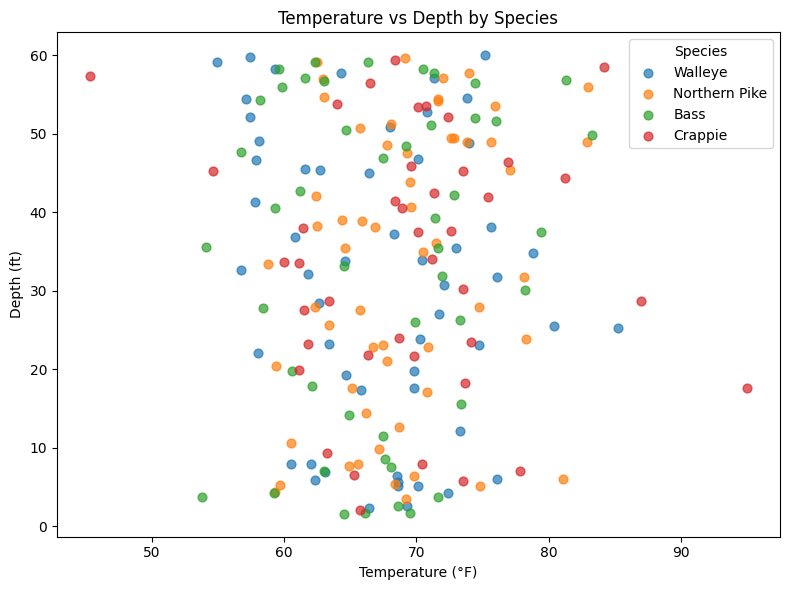

In [53]:
plt.figure(figsize=(8,6))
# Get unique species and assign colors manually
species_list = df["species"].unique()
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]

# Plot a separate scatter set for each species
for sp, c in zip(species_list, colors):
    sub = df[df["species"] == sp]
    plt.scatter(sub["temperature_f"], sub["depth_ft"], label=sp, alpha=0.7, s=40)

plt.xlabel("Temperature (°F)")
plt.ylabel("Depth (ft)")
plt.title("Temperature vs Depth by Species")
# plt.gca().invert_yaxis()
plt.legend(title="Species")
plt.tight_layout()
plt.savefig("Temperature_vs_Depth_by_Species.png", dpi=300, bbox_inches="tight")
plt.show()

In [54]:
#As there are no clusters forming for different species we cannnot estabish a hypothesis that a certain type of
#species swims at a depth or that at a certain temperature they swim at a certain depth.